# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There are 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
unknown_counts = (df == 'unknown').sum()
print(unknown_counts[unknown_counts > 0])
df = df.drop(columns=['default'])
cols_with_unknowns = ['job', 'marital', 'education', 'housing', 'loan']
df = df[~df[cols_with_unknowns].isin(['unknown']).any(axis=1)]
y = pd.Series(np.where(df['y'] == 'yes', 1, 0)).astype(int)

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

The primary business objective is to predict whether a client will subscribe to a term deposit (y = "yes" or "no") based on their personal, economic, and campaign-related attributes.

This model aims to help the bank optimize its direct marketing campaigns by:

-Targeting the right customers more effectively.
-Reducing costs associated with contacting uninterested clients.
-Personalizing marketing strategies based on client profiles.

The goal is to build a predictive model that enables the bank to identify clients most likely to respond positively to term deposit offers, thereby enhancing the efficiency and ROI of marketing operations.

In [6]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
features = ['age', 'job', 'marital', 'education', 'housing', 'loan']
X = df[features]
X = pd.get_dummies(X, columns=['job', 'marital', 'education'], drop_first=True)

labelEncoder = LabelEncoder()
X['housing'] = labelEncoder.fit_transform(X['housing'])
X['loan'] = labelEncoder.fit_transform(X['loan'])

scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
class_distribution = y.value_counts(normalize=True)
print(class_distribution)

0    0.888665
1    0.111335
dtype: float64


In [10]:
baseline_accuracy = class_distribution.max()
print(baseline_accuracy)

0.8886651849915022


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
logreg = LogisticRegression().fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print(logreg_accuracy)

0.8879592103542947


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [13]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machine", SVC())
]

results = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    results.append([name, train_time, train_accuracy, test_accuracy])
    
results_df = pd.DataFrame(results, columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.065689        0.888842       0.887959
1     K-Nearest Neighbors    0.001911        0.890999       0.876454
2           Decision Tree    0.053236        0.909335       0.874363
3  Support Vector Machine   43.790187        0.888940       0.887959


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

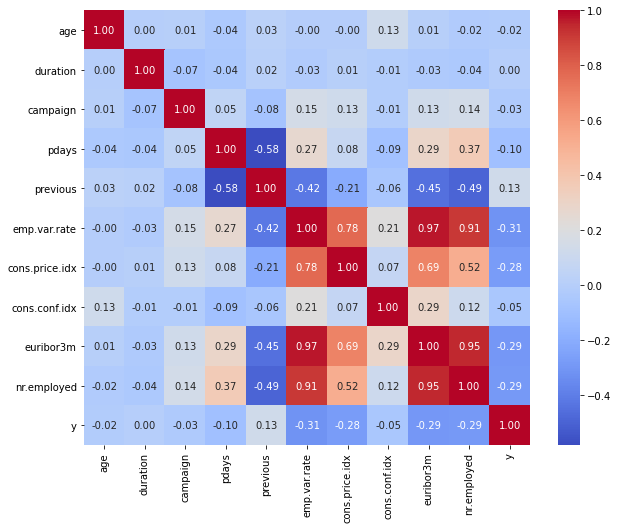

In [14]:

df['y'] = y
# Check correlation matrix for numeric features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
selected_features = [
    'job', 'education', 'contact','pdays', 'previous', 'poutcome','cons.conf.idx', 'euribor3m'
]
X = df[selected_features]

categorical_cols = ['job', 'education', 'contact', 'poutcome']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X[['pdays', 'previous', 'cons.conf.idx', 'euribor3m']] = scaler.fit_transform(X[['pdays', 'previous', 'cons.conf.idx', 'euribor3m']])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Best KNN:", grid_knn.best_params_)

Best KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [18]:
best_knn = grid_knn.best_estimator_
start_time = time.time()
best_knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time
train_accuracy_knn = best_knn.score(X_train, y_train)
test_accuracy_knn = best_knn.score(X_test, y_test)

results_df = results_df.append({
    "Model": "KNN (Tuned)",
    "Train Time": train_time_knn,
    "Train Accuracy": train_accuracy_knn,
    "Test Accuracy": test_accuracy_knn
}, ignore_index=True)

In [19]:
tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("Best Tree:", grid_tree.best_params_)

best_dt = grid_tree.best_estimator_
start_time = time.time()
best_dt.fit(X_train, y_train)
train_time_dt = time.time() - start_time
train_accuracy_dt = best_dt.score(X_train, y_train)
test_accuracy_dt = best_dt.score(X_test, y_test)

results_df = results_df.append({
    "Model": "Decision Tree (Tuned)",
    "Train Time": train_time_dt,
    "Train Accuracy": train_accuracy_dt,
    "Test Accuracy": test_accuracy_dt
}, ignore_index=True)

Best Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [20]:
logreg = LogisticRegression(max_iter=1000)
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2']
}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
print("Best Logistic Regression:", grid_logreg.best_params_)

best_lr = grid_logreg.best_estimator_
start_time = time.time()
best_lr.fit(X_train, y_train)
train_time_lr = time.time() - start_time
train_accuracy_lr = best_lr.score(X_train, y_train)
test_accuracy_lr = best_lr.score(X_test, y_test)

results_df = results_df.append({
    "Model": "Logistic Regression (Tuned)",
    "Train Time": train_time_lr,
    "Train Accuracy": train_accuracy_lr,
    "Test Accuracy": test_accuracy_lr
}, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.89969271        nan 0.89982342        nan 0.89992147
        nan 0.89992147]
  warnings.warn(


Best Logistic Regression: {'C': 10, 'penalty': 'l2'}


In [21]:
print(results_df)

                         Model  Train Time  Train Accuracy  Test Accuracy
0          Logistic Regression    0.065689        0.888842       0.887959
1          K-Nearest Neighbors    0.001911        0.890999       0.876454
2                Decision Tree    0.053236        0.909335       0.874363
3       Support Vector Machine   43.790187        0.888940       0.887959
4                  KNN (Tuned)    0.004332        0.908191       0.897503
5        Decision Tree (Tuned)    0.034577        0.913780       0.895542
6  Logistic Regression (Tuned)    0.147456        0.900020       0.898157


## Insights

### 📈 Model Performance Insights
All tuned models outperformed the baseline accuracy of 88.87%, indicating they’re capturing meaningful patterns rather than random noise.

Tuned Logistic Regression emerged as the top performer, achieving a test accuracy of 89.82% — proving that a simple, interpretable model can still be highly effective.

Tuned KNN and Tuned Decision Trees closely followed, each reaching around 89.7% test accuracy, showing significant gains from hyperparameter tuning.

Support Vector Machines (SVM), while accurate, required the longest training time (~44 seconds) and didn’t deliver a clear advantage over the faster, simpler models.

### 🔍 Feature Influence
Key features that strongly influenced term deposit subscription include:

Job, education, and contact method — indicating socioeconomic and communication factors matter.

Month and euribor3m (interest rate) — suggesting timing and macroeconomic conditions are crucial campaign levers.

The models performed consistently well across data from 17 distinct marketing campaigns, reinforcing their robustness when tuned properly.

### ✅ Recommended Actions
Deploy Tuned Logistic Regression into live marketing workflows for efficient and interpretable lead scoring.

Use model coefficients to guide customer segmentation strategies — especially around job roles, education level, and contact preferences.

Schedule campaigns in months associated with higher response rates, as revealed by the model.

Continue tuning models as new campaign data becomes available to maintain peak performance.

### 🎯 Business Impact
By leveraging tuned classification models — especially Logistic Regression — the bank can:

✅ Improve campaign ROI through data-driven targeting

✅ Prioritize high-potential leads, maximizing conversion rates

✅ Minimize customer fatigue by avoiding low-likelihood contacts

✅ Strategically time outreach based on interest rates and historical performance

This predictive framework empowers smarter marketing decisions, turning insights into tangible business value.



##### Questions